# Interactive Python using jupyter notebooks

- Notebooks are made of a sequence of cells
- Cells can contain different content such as Python code, or Markdown
- You can change the cell type in the toolbar
- To execute a cell press "Shift+Return"
- Use the tool bar to add, delete, copy, or insert cells

(Note: to learn more about Markdown check [Daring Fireball's website](https://daringfireball.net/projects/markdown/syntax))

## Import the Python package for numerical arrays (numpy)

In [1]:
import numpy as np

## Define a function that creates some statistical data

In [2]:
def load_data():    
    # Goalkeeper, defender, midfielder, attacker
    possible_positions = ['GK', 'D', 'M', 'A']
    N = 100
    positions = []
    heights = []
    for i in range(0,N):
        positions.append(possible_positions[np.random.randint(len(possible_positions))])
        heights.append(np.random.normal(loc=180.0,scale=5.0))     #the loc argument represents the mean (μ) of the normal distribution.
    return positions, heights

## Read the data

In [3]:
positions, heights = load_data()

The objects ```positions``` and ```heights``` are lists as we can check using the Python function ```type```:

In [4]:
print(type(positions))
print(type(heights))

<class 'list'>
<class 'list'>


Question: *How many items are inside the lists ```positions``` and ```heights```?

Hint: Use the Python function ```len```. 

In [5]:
print(len(positions))
print(len(heights))

100
100


## Convert to numpy arrays

In [6]:
np_positions = np.array(positions)
np_heights = np.array(heights)

Question: *what is the data type of ```np_positions``` and ```np_heights```*?<br>
Question: *what is the shape of ```np_positions``` and ```np_heights```*?


Hint: Numpy objects have member functions called ```dtype``` and ```shape```.

In [8]:
print(np_positions.dtype) 
print(np_heights.dtype)   
#<U2 means that the NumPy array np_positions contains Unicode strings with a
#maximum length of 2 characters
#< → Little-endian (byte order, usually not important for strings).
#U → Unicode string data type.
#2 → Maximum length of each string in the array (2 characters).
#This means that positions (before conversion to a NumPy array)
#contained short strings of 2 characters or fewer.

<U2
float64


## Extract the heights of the goalkeepers

In [9]:
gk_heights = np_heights[np_positions == 'GK']

## Print the median of the goalkeepers heights

In [10]:
print("Median height of goalkeepers: " + str(np.median(gk_heights)))

Median height of goalkeepers: 181.0935036339976


Question: *what is the median height of all the field players*?<br>
Question: *what is the median height of all the attackers*?<br>
Question: *what is the median height of goalkeepers and the attackers combined?*

In [11]:
print("Median height of all players: " + str(np.median(np_heights)))
A_heights = np_heights[np_positions == 'A']
print("Median height of attackers: " + str(np.median(A_heights)))
comb_heights = np.concatenate((A_heights, gk_heights))
print("Median height of goalkeepers and attackers: " + str(np.median(comb_heights)))

Median height of all players: 180.46315604970906
Median height of attackers: 179.44525802414415
Median height of goalkeepers and attackers: 181.01665048336446


## More statistical tests

Besides the ```median```, numpy als comes with the functions ```mean```, ```std```, ```min``` and ```max``` which are useful for investigating statistical data. 

Question: *Who is the shortest player (which position)*?<br>
Question: *Who is the tallest player (which position)*?

In [12]:
print("Height of the hobbit: ", np.min(np_heights))
print("Height of Gandolf: ", np.max(np_heights))

Height of the hobbit:  168.15049880868986
Height of Gandolf:  192.4582247828373


## Data plotting

For plotting, we need the package matplotlib

In [13]:
import matplotlib.pyplot as plt

There are different display modes for matplotlib plots inside a jupyter notebook.

In [14]:
# For inline plots use
%matplotlib inline  
#visualizations (e.g., Matplotlib plots) that are displayed directly inside the Jupyter Notebook, rather than opening in a separate window

In [15]:
# For inline plots with interactive capabilities use
%matplotlib notebook

In [16]:
%matplotlib ipympl

Lets visualize the height distribution of the defenders

In [17]:
d_heights = np_heights[np_positions == 'D']

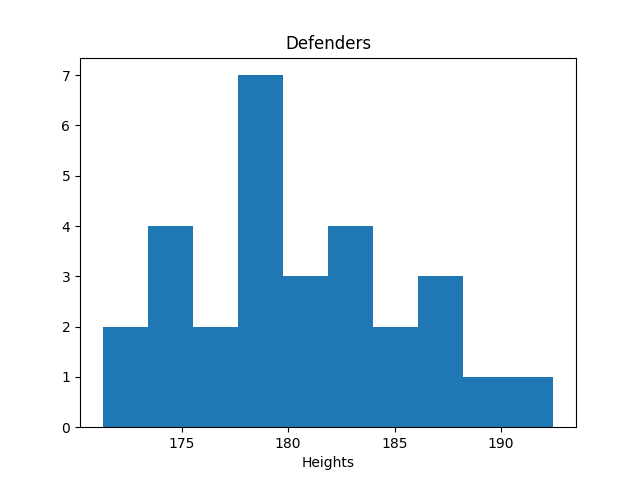

In [18]:
plt.figure()
plt.hist(d_heights)
plt.title('Defenders')
plt.xlabel('Heights')
plt.show()

To figure out the tallest/shortest player, we can the max/min within each position

In [21]:
p = ['GK', 'D', 'M', 'A']
p_max = [np_heights[np_positions == i].max() for i in p]

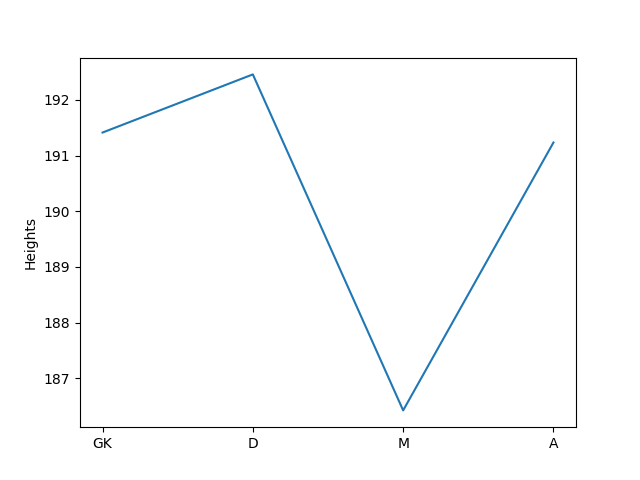

In [20]:
plt.figure()
plt.plot(range(len(p)), p_max)
plt.gca().xaxis.set_ticks(range(len(p)))
plt.gca().xaxis.set_ticklabels(p)
plt.ylabel('Heights')
plt.show()

For inspiration on data plotting and more examples, check out the matplotlib gallery: [https://matplotlib.org/gallery.html](https://matplotlib.org/gallery.html)